In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state
%matplotlib inline

NUM_BINS = 10
N = 10000 # takes value from 1 to 10000
K = 1 # select one class

In [2]:
# Load prediction from ResNet on CIFAR100 test data, which contains 10,000 images. 
# https://github.com/rloganiv/pytorch-classification/blob/master/predict.py
# data: a numpy array of size 10,000 * 101. For each row, the first entry is the true label,
#       following by softmax of output logits of this image for each class.
data = np.genfromtxt("cifar100_predictions_dropout.txt")[0:N,:]# 10000*101

In [3]:
probabilities = data[:,1:]
Y_predict = np.argmax(probabilities, axis=1)
Y_true = data[:,0]
# confidence = np.max(probabilities, axis=1)
# bins = np.linspace(0, 1, NUM_BINS+1)
# digitized = np.digitize(confidence, bins)-1

In [4]:
def isotonic_regression(x, y, w=[]):
    
    if len(w) == 0:
        w = [1.0 for _ in y]
    n = len(y)
        
    # Fit IsotonicRegression and LinearRegression models
    ir = IsotonicRegression()
    y_ = ir.fit_transform(x, y, sample_weight = w)
    
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y, sample_weight = w)  # x needs to be 2d for LinearRegression
    
    # Plot result
    segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
    lc = LineCollection(segments, zorder=0)
    lc.set_array(np.ones(len(y)))
    lc.set_linewidths(np.full(n, 0.5))

    fig = plt.figure(figsize = (5,4))
    plt.plot(x, y, 'r.', markersize=12, alpha = 0.5)
    plt.plot(x, y_, 'g^', markersize=12, alpha = 0.5)
    plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
    plt.gca().add_collection(lc)
    plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
    plt.title('Isotonic regression')

In [5]:
Y_predict_K = probabilities[:,K]
Y_true_K = np.array((Y_true == K)) * 1

# digitized_K = np.digitize(Y_predict_K[:,1], bins)-1
# unique, counts = np.unique(digitized_K, return_counts=True)
# counts_K = counts[unique]
# # compute accuracy per bin
# print set(digitized_K)

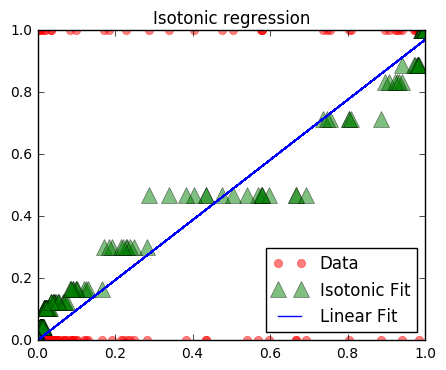

In [6]:
isotonic_regression(Y_predict_K, Y_true_K)
#plt.plot(Y_predict_K, Y_true_K)